# Week 9 - Multivariate Analysis, part 2

# 1. Lesson - no lesson this week

# 2. Weekly graph question

The graph below plots the first two principal component scores in a scatter plot.  What can be said about the three outliers in the upper left corner of the graph?  Is their first principal component score high or low?  What about their second principal component score?  What does that mean about their values in series_1, series_2, and series_3?  It seems to me that you can say something about series_3 (what can you say?) but you may have a harder time saying something about series_1 and series_2, and an almost impossible time saying anything about the relative values of series_1 and series_2.  Why is that?  How are series_1 and series_2 related, according to how they were created?  If you like, try drawing a pairplot for all three series and see what you get.

Overall, what are the advantages and disadvantages of the graph below?  Does it show anything interesting?

[0.79916477 0.18990532 0.01092991]
[[ 0.26541493  0.30096233  0.91595665]
 [ 0.60337553  0.6891417  -0.40127506]
 [ 0.75199261 -0.65917023 -0.00131519]]


Text(0, 0.5, 'Second Principal Component Score')

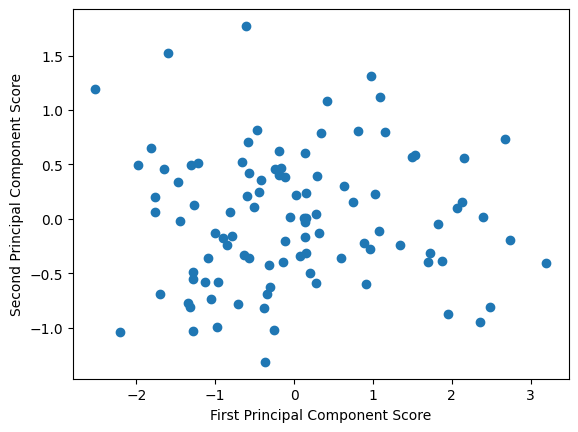

In [1]:
import numpy as np
import pandas as pd
from sklearn import decomposition
import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(0)
num_points = 100
series_1 = np.random.normal(loc = 2, scale = 0.5, size = num_points)
series_2 = series_1 * (1 + np.random.normal(loc = 0, scale = 0.1, size = num_points))
series_3 = series_1 * (1 + np.random.normal(loc = 0, scale = 0.5, size = num_points))
df = pd.DataFrame({'ser1': series_1, 'ser2': series_2, 'ser3': series_3})
df = df - df.mean() # set mean to zero, so we don't have to subtract mean from the principal component scores

pca3 = decomposition.PCA(n_components = 3)
pca3.fit(df)
print(pca3.explained_variance_ratio_)
print(pca3.components_)

first_principal_component_score = df.dot(pca3.components_[0])
second_principal_component_score = df.dot(pca3.components_[1])
plt.scatter(first_principal_component_score, second_principal_component_score)
plt.xlabel("First Principal Component Score")
plt.ylabel("Second Principal Component Score")

Three outliers
- score low in PC1 
- score high in PC2

Advantages
- reduces number of dimension for easy visualization
- indicates direction of most variance
- highlights outliers

Disadvantages
- indirect view of original relationships of variables
- since we're no longer looking at original feature set, the viewer must understand PCs and therefore interpretation requires understanding of PCA
-

Intersting interpretation
- where PC plots shine is showing the direction of most variance

---

# 3. Working on your datasets

This week, you will do the same types of exercises as last week, but you should use your own datasets that you found last semester.

Here are some types of analysis you can do:
Draw heatmaps.

Draw bubble plots.

Perform Principal Component Analysis to find out the directions in which the data varies.  Can you represent the data using only its projection onto its first principal component, using the methods described in Week 8?  How much of the variance would this capture?

Try performing linear regression analysis using different sets of features.  Which features seem most likely to be useful to predict other features?

Conclusions:
Explain what conclusions you would draw from this analysis: are the data what you expect? Are the data likely to be usable? If the data are not useable, find some new data!

Do you see any outliers? (Data points that are far from the rest of the data).

Does the Principal Component Analysis suggest a way to represent the data using fewer dimensions than usual - using its first one or two principal component scores, perhaps?

Try using your correlation information from previous weeks to help choose features for linear regression.

---

As all of these datasets are classification tasks, performing linear regression would be moot.

In [2]:
cyber_df = pd.read_csv('cybersecurity_attacks.csv')
beth_df = pd.read_csv('labelled_training_data.csv')
UNSW_df = pd.read_parquet('UNSW_NB15_training-set.parquet')

In [3]:
def plot_heatmap(df, df_name="DataFrame", figsize=(16, 10), annot=True, cmap='coolwarm', title=None):

    # Compute the correlation matrix for numeric columns only
    correlation_matrix = df.corr(numeric_only=True)
    
    # Set a default title if not provided
    if title is None:
        title = f'Correlation Matrix for {df_name}'
    
    # Plot the heatmap
    plt.figure(figsize=figsize)
    sns.heatmap(correlation_matrix, annot=annot, cmap=cmap)
    plt.title(title)
    plt.show()

In [4]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

def perform_and_plot_pca(df, n_components=2):
    
    # Select only continuous columns (numerical types)
    continuous_features = df.select_dtypes(include=[np.number])
    
    # Standardize the continuous features
    scaler = StandardScaler()
    continuous_scaled = scaler.fit_transform(continuous_features)
    
    # Initialize PCA with the number of components you want
    pca = PCA(n_components=n_components)
    
    # Perform PCA on the standardized data
    principal_components = pca.fit_transform(continuous_scaled)
    
    # Create a DataFrame with the PCA results
    pca_df = pd.DataFrame(data=principal_components, columns=[f'PC{i+1}' for i in range(n_components)])
    
    # Explained variance ratio 
    print("Explained variance ratio:", pca.explained_variance_ratio_)
    
    # Visualize the PCA components if n_components = 2
    if n_components == 2:
        # Plotting the PC Scores (dot product with the original data)
        first_principal_component_score = continuous_scaled.dot(pca.components_[0])
        second_principal_component_score = continuous_scaled.dot(pca.components_[1])
        
        plt.figure(figsize=(8, 6))
        plt.scatter(first_principal_component_score, second_principal_component_score)
        plt.title('PC Scores - First vs Second Principal Component')
        plt.xlabel('First Principal Component Score')
        plt.ylabel('Second Principal Component Score')
        plt.show()
    
    return pca_df, pca


Explained variance ratio: [0.25233408 0.25083918]


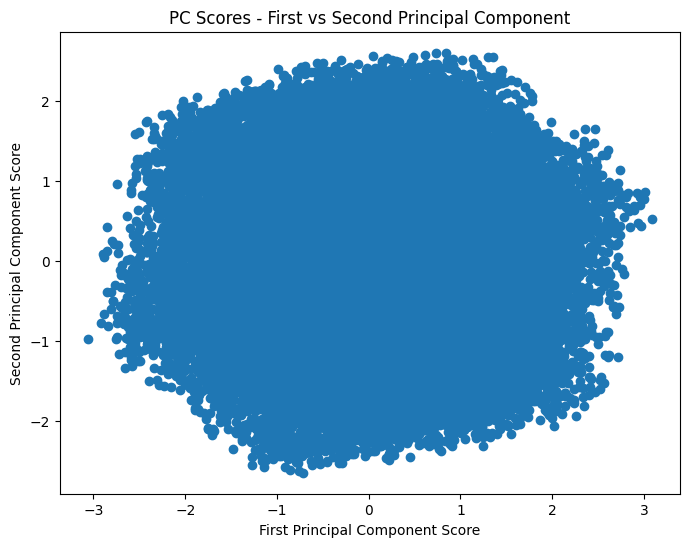

        PC1       PC2
0 -0.113889 -0.497197
1  1.065070  0.380277
2  0.191222 -1.601828
3  0.896229 -0.906115
4  1.855950  0.944071


In [5]:
pca_result, pca_model = perform_and_plot_pca(cyber_df, n_components=2)

# Display the resulting PCA DataFrame
print(pca_result.head())

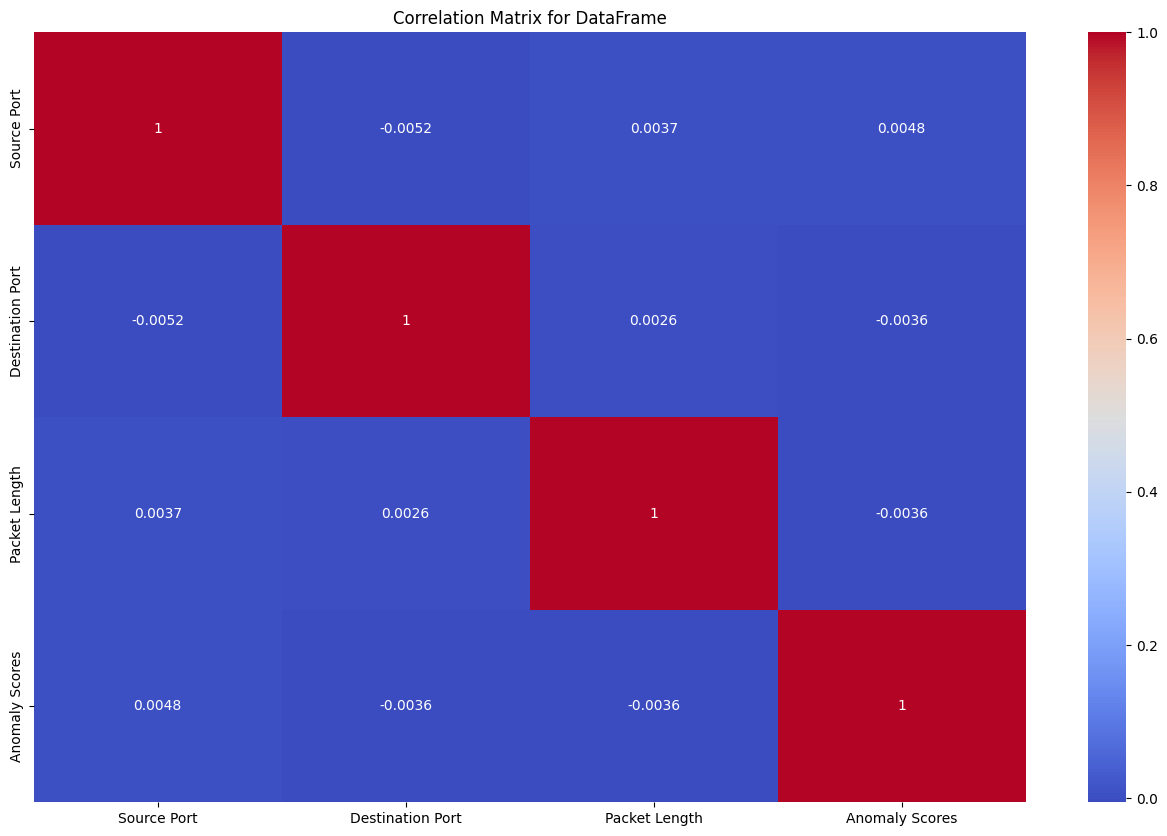

In [6]:
plot_heatmap(cyber_df)

Explained variance ratio: [0.23420185 0.18685046]


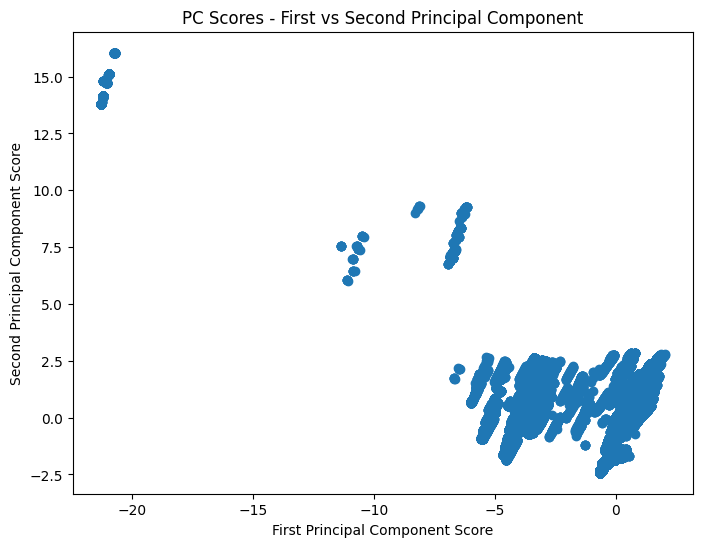

         PC1       PC2
0 -10.726689  7.542917
1 -11.112539  6.032569
2 -10.890286  6.976519
3  -6.681472  7.377834
4  -6.212518  9.279721


In [7]:
pca_result, pca_model = perform_and_plot_pca(beth_df, n_components=2)

# Display the resulting PCA DataFrame
print(pca_result.head())

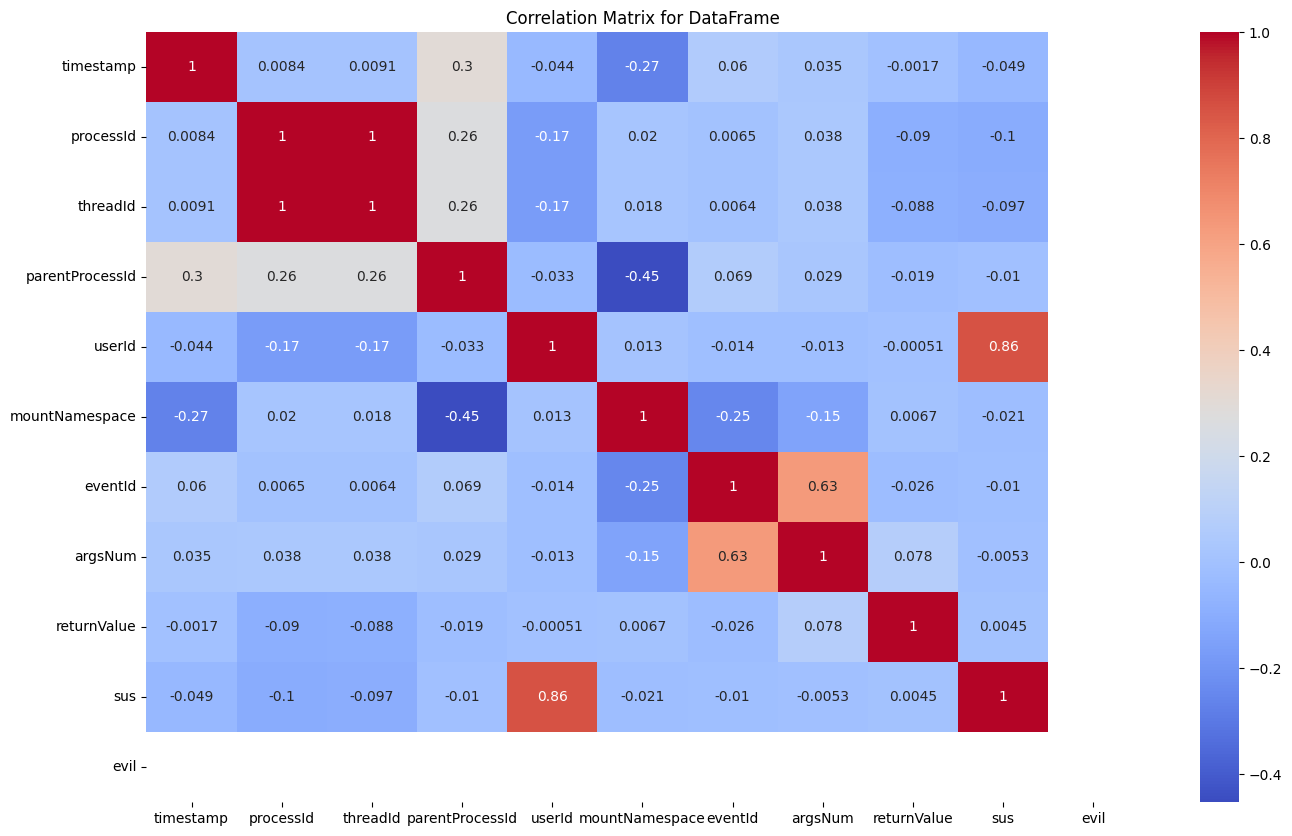

In [8]:
plot_heatmap(beth_df)

Explained variance ratio: [0.20405179 0.11395086]


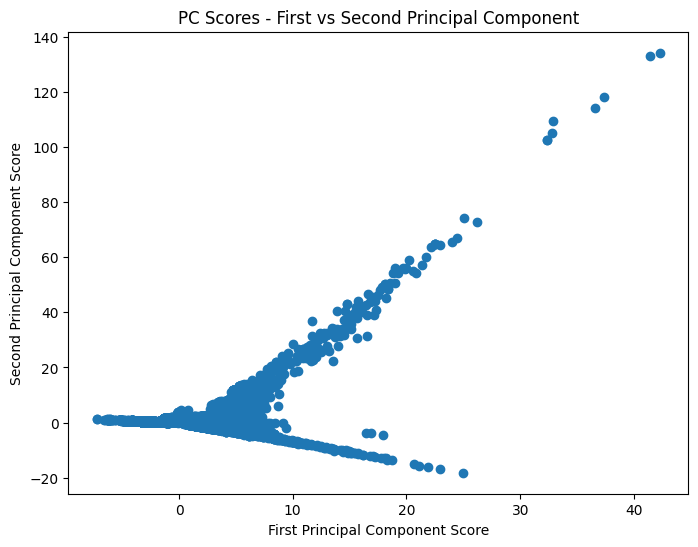

        PC1       PC2
0  0.986310 -0.220137
1  2.377267  0.971071
2  3.457087 -0.393837
3  1.890964 -0.847276
4  2.523694 -1.172190


In [9]:
pca_result, pca_model = perform_and_plot_pca(UNSW_df, n_components=2)

# Display the resulting PCA DataFrame
print(pca_result.head())

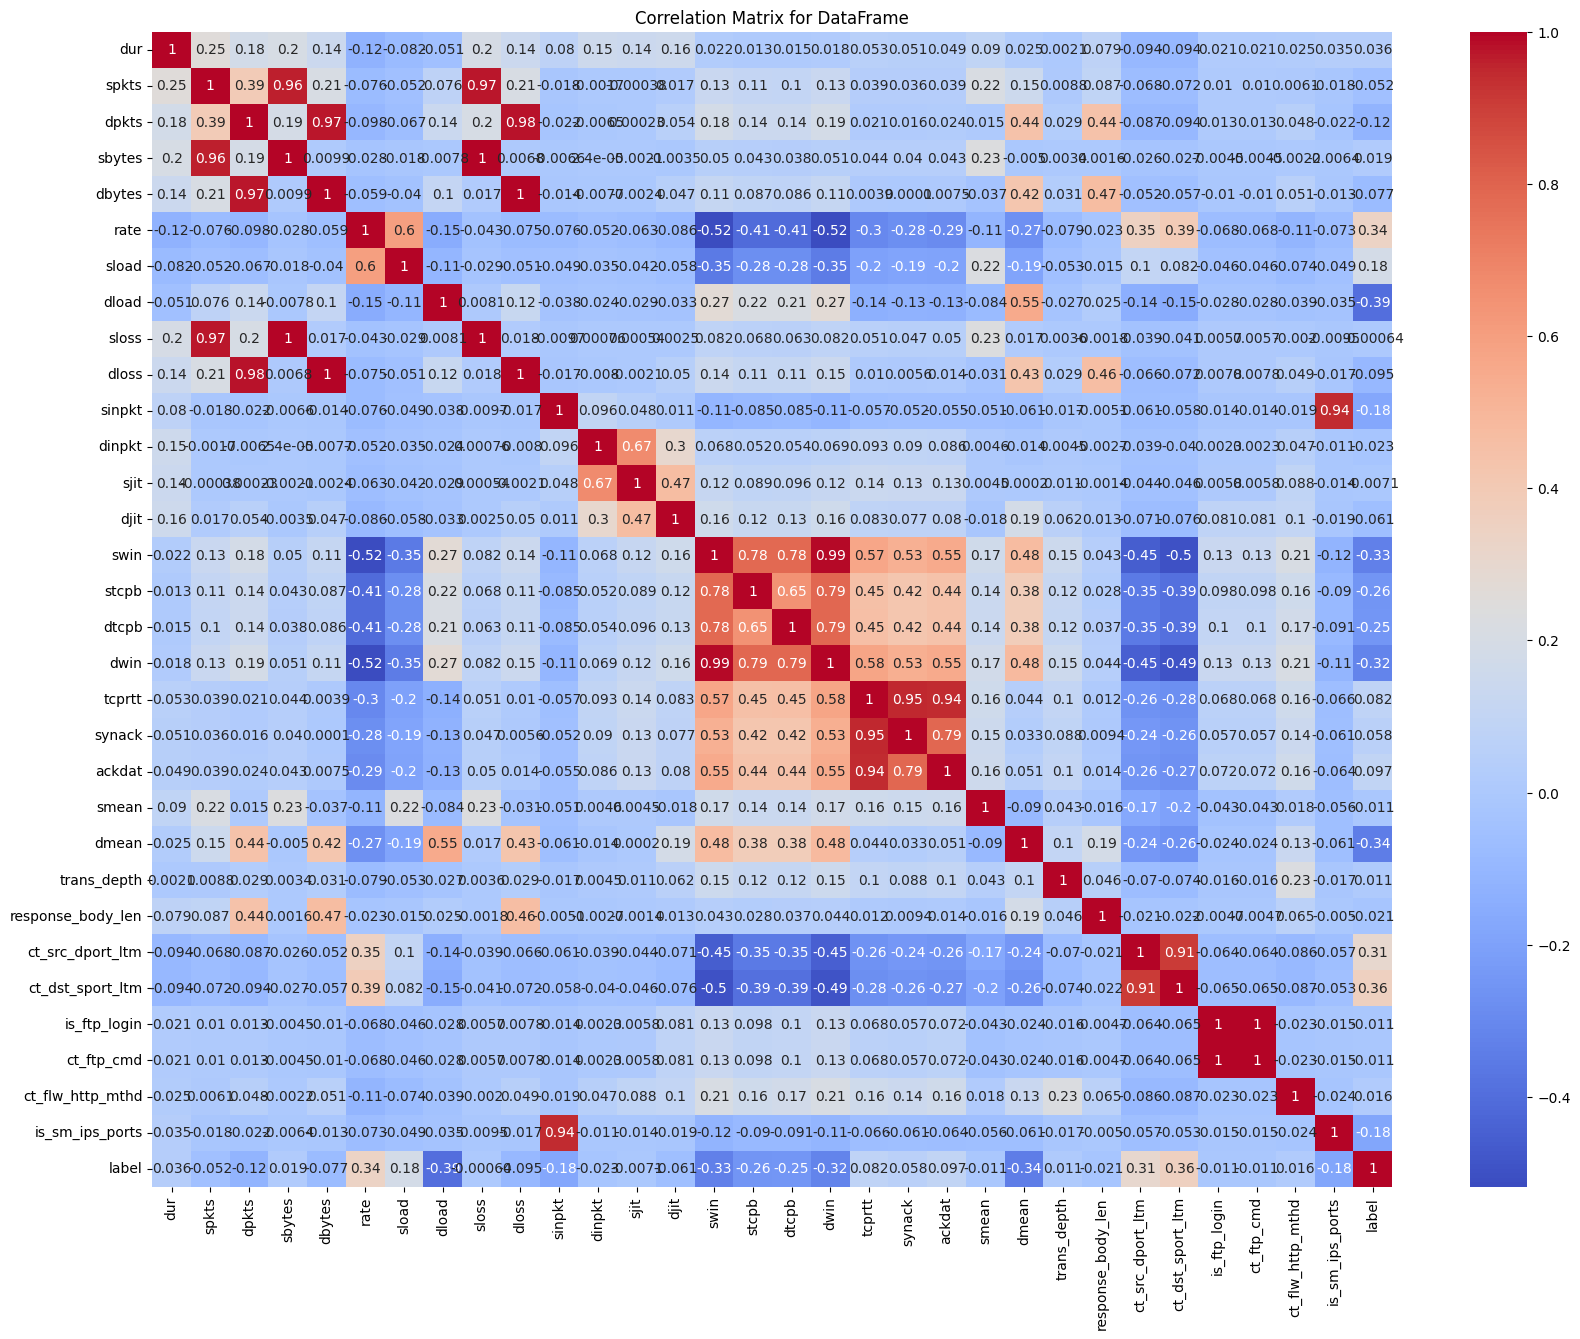

In [10]:
plot_heatmap(UNSW_df, figsize=(20,15))

There are definitely some patterns emerging within the beth dataframe and UNSW dataframe. The same can't be said for the cybersecurity attacks dataframe.

Good news for the UNSW dataset as it contains high dimensionality.

However, the short comings of this analysis are that although PC1 captures the majority of variance for the beth and UNSW dataframe, the variance ratio itself are not particularly high at 0.234 and 0.204 respectively. To capture 80-90% of the variance, many more PCs would need to be included.

There are outliers in the upper left of the beth dataframe, as well as outliers in the upper right of the UNSW dataframe.

# 4. Storytelling With Data plot

Reproduce any graph of your choice in p. 136-150 of the Storytelling With Data book as best you can. ("The power of super-categories" to the end of chapter 5). You do not have to get the exact data values right, just the overall look and feel.

/tmp/ipykernel_75234/240382298.py:33: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels)


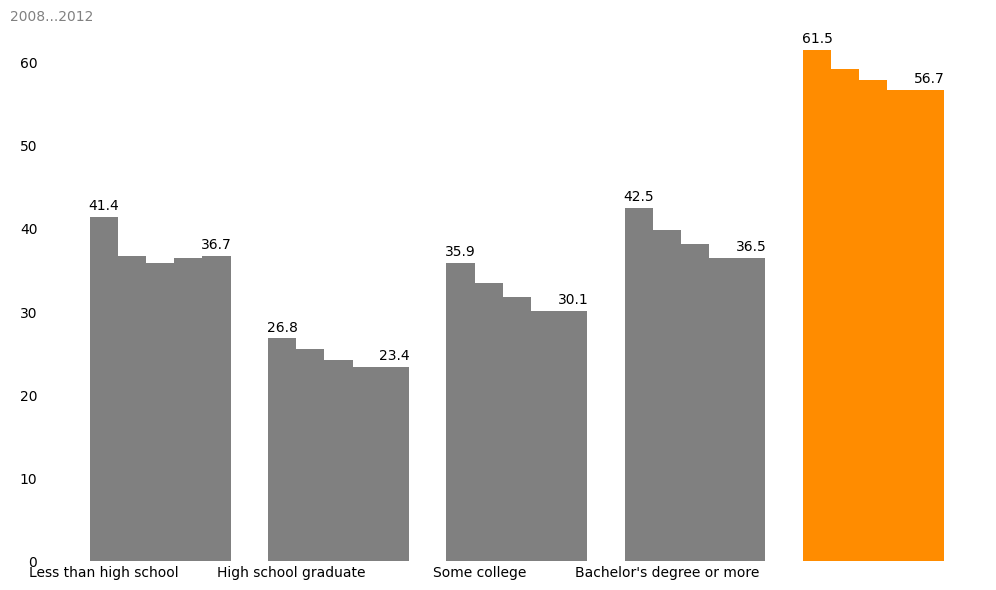

In [11]:
# Data (approximated)
labels = ['All', 'Less than high school', 'High school graduate', 'Some college', "Bachelor's degree or more"]
years = ['2008', '2009', '2010', '2011', '2012']
data = {
    'All': [41.4, 36.7, 35.8, 36.5, 36.7],
    'Less than high school': [26.8, 25.5, 24.2, 23.4, 23.4],
    'High school graduate': [35.9, 33.5, 31.8, 30.1, 30.1],
    'Some college': [42.5, 39.8, 38.1, 36.5, 36.5],
    "Bachelor's degree or more": [61.5, 59.2, 57.8, 56.7, 56.7]
}

# Set the width of the bars
bar_width = 0.15
x = np.arange(len(labels))  # Positions for the groups of bars

# Create the figure and axes
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the bars for each year within each group
for i, year in enumerate(years):
    offsets = np.arange(len(labels)) * (len(years) * bar_width + 0.2) # Adjust 0.2 for spacing
    rects = ax.bar(offsets + i * bar_width, [data[label][i] for label in labels], bar_width, label=year, color=['gray'] * 4 + ['darkorange'])
    for j, rect in enumerate(rects):
        if i == 0 or i == len(years) - 1:
            height = rect.get_height()
            ax.annotate(f'{height:.1f}',
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 3),
                        textcoords="offset points",
                        ha='center', va='bottom')

# Add labels and title
ax.set_xticklabels(labels)
ax.tick_params(axis='x', length=0)
ax.tick_params(axis='y', left=False)
ax.spines[['right', 'left', 'top', 'bottom']].set_visible(False)

# Add the "2008...2012" label
ax.text(-0.5, 65, '2008...2012', fontsize=10, color='gray')

plt.tight_layout()
plt.show()